# Tehtävä 2: Histogrammi ja hajontakuvioita

Tässä notebookissa:
1. Luetaan sama Excel-tiedosto (`Opinnäytetyökysely.xlsx`) pandas-DataFrameen.
2. Tulostetaan käytettävissä olevat sarakkeet.
3. Piirretään histogrammi sarakkeesta **“Sain riittävästi ohjausta”**.
4. Piirretään hajontakuvio sarakkeiden **“Pystyin itse vaikuttamaan opinnäytetyöni ohjaajan valintaan”** ja **“Sain riittävästi ohjausta”** välillä.
5. Piirretään hajontakuvio sarakkeiden **“Opinnäytetyön tekemisaika työviikkoina (…)”** vs. **“Thesis grade”** välillä (poistetaan ensin puuttuvat arvosanat).

## 1) Kirjastojen tuonti ja Excel-tiedoston lukeminen

Ladataan pandas ja matplotlib, ja luetaan Excel-tiedosto DataFrameen.  
Varmista, että `Opinnäytetyökysely.xlsx` on samassa hakemistossa kuin tämä notebook (tai päivitä polku).

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Vaihda polku tarvittaessa, jos Excel-tiedosto ei ole tässä hakemistossa
file_path = r"D:\GitHub\PythonDataAnalytics\doc\Opinnäytetyökysely.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

# Tarkistetaan, että DataFrame on latautunut
df.shape  # (rivit, sarakkeet)

(242, 42)

## 2) Saatavilla olevat sarakkeet

Tulostetaan dataframe-olion sarakenimet listana, jotta näemme, mitä muuttujia voi käyttää.

In [36]:
df.columns.to_list()

['Aikaleima',
 'Kuinka löysit aiheesi?',
 'Opinnäytetyöni oli hankkeistettu',
 'Oliko työsi teoreettinen vai käytännöllinen? Teoreettinen (1) - Käytännöllinen (5)',
 'Pystyin itse vaikuttamaan aiheen valintaan',
 'Olin innostunut opinnäytetyötä tehdessäni',
 'Pystyin itse vaikuttamaan opinnäytetyöni ohjaajan valintaan',
 'Sain riittävästi ohjausta',
 'Hankin itse aktiivisesti tietoa työni aiheesta',
 'Tutkimusaiheeni kiinnosti minua',
 'Sain muilta opiskelijoilta tukea työni tekemisessä',
 'Työn toimeksiantaja oli kiinnostunut työstäni',
 'Työn toimeksiantaja oli kiinnostunut ohjaamaan työtäni',
 'Ohjaajani panos tuki työtäni',
 'Saamani ohjaus oli asiantuntevaa',
 'Valmistauduin ohjauspalavereihin',
 'Saamani ohjaus oli motivoivaa',
 'Työni ohjaaja vastasi nopeasti tiedusteluihini',
 'Ohjaustilanteet eivät tuntuneet minusta pelottavilta',
 'Ohjaajaani oli helppo lähestyä',
 'Luotin ohjaajani neuvoihin',
 'Eri ohjaustapojen käyttäminen ja niiden hyödyllisyys: Seminaarit',
 'Eri ohjaust

## 3) Histogrammi sarakkeesta “Sain riittävästi ohjausta”

Tämä sarake on numeerinen (arvot 1–5). Piirretään histogrammi, jossa on binit kunkin kokonaisarvon kohdalle.

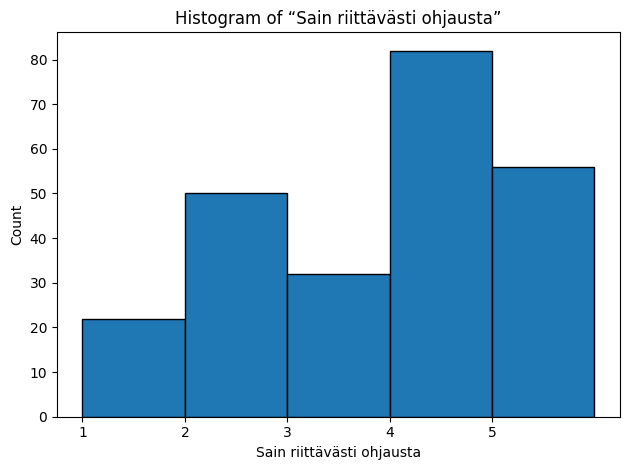

In [37]:
guidance_col = "Sain riittävästi ohjausta"
guidance = df[guidance_col].dropna().astype(int)

plt.figure()
plt.hist(
    guidance,
    bins=range(guidance.min(), guidance.max() + 2),
    edgecolor="black"
)
plt.xticks(range(guidance.min(), guidance.max() + 1))
plt.xlabel(guidance_col)
plt.ylabel("Count")
plt.title("Histogram of “Sain riittävästi ohjausta”")
plt.tight_layout()
plt.show()

## 4) Hajontakuvio: “Vaikutus ohjaajaan” vs. “Sain riittävästi ohjausta”

- x-akselilla sarake **“Pystyin itse vaikuttamaan opinnäytetyöni ohjaajan valintaan”**  
- y-akselilla sarake **“Sain riittävästi ohjausta”**

Molemmat muuttujat ovat numeerisia asteikolla 1–5. Pudotetaan NaN-arvot pois ennen piirtoa.

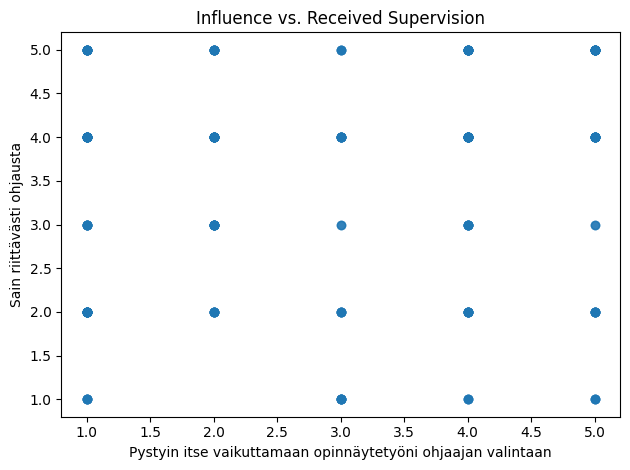

In [38]:
influence_col = "Pystyin itse vaikuttamaan opinnäytetyöni ohjaajan valintaan"
influence = df[influence_col].dropna().astype(int)

# Vastaavat “guidance”-arvot samoilta indekseiltä
paired_guidance = df.loc[influence.index, guidance_col].astype(int)

plt.figure()
plt.scatter(influence, paired_guidance, alpha=0.7)
plt.xlabel(influence_col)
plt.ylabel(guidance_col)
plt.title("Influence vs. Received Supervision")
plt.tight_layout()
plt.show()

## 5) Hajontakuvio: “Opinnäytetyön tekemisaika” vs. “Thesis grade”

- Sarake **“Opinnäytetyön tekemisaika työviikkoina (…)”** (float)
- Sarake **“Thesis grade”** (float)

Poistetaan kaikki rivit, joilla ei ole arvosanaa, ja muutetaan molemmat sarakkeet numeerisiksi ennen piirtoa.

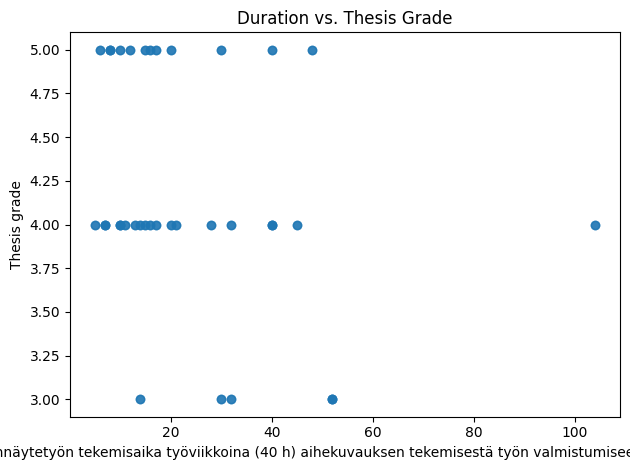

In [39]:
time_col = "Opinnäytetyön tekemisaika työviikkoina (40 h) aihekuvauksen tekemisestä työn valmistumiseen:työviikkoa"
grade_col = "Thesis grade"

# Poistetaan rivit, joilla arvosana puuttuu
df2 = df.dropna(subset=[grade_col]).copy()
df2[time_col] = df2[time_col].astype(float)
df2[grade_col] = df2[grade_col].astype(float)

plt.figure()
plt.scatter(df2[time_col], df2[grade_col], alpha=0.7)
plt.xlabel(time_col)
plt.ylabel(grade_col)
plt.title("Duration vs. Thesis Grade")
plt.tight_layout()
plt.show()

# Yhteenveto

Jupyter-notebookin:

- Tuodaan `Opinnäytetyökysely.xlsx` pandas-DataFrameksi.
- Tulostetaan käytettävissä olevat sarakkeet (`df.columns.to_list()`).
- Piirretään histogrammi sarakkeesta **“Sain riittävästi ohjausta”**.
- Piirretään hajontakuvio sarakkeiden **“Pystyin itse vaikuttamaan opinnäytetyöni ohjaajan valintaan”** vs. **“Sain riittävästi ohjausta”** välillä.
- Poistetaan rivit, joilla **“Thesis grade”** puuttuu, ja piirretään hajontakuvio **“Opinnäytetyön tekemisaika työviikkoina (…)”** vs. **“Thesis grade”**.